In [46]:
'''import various Libraries'''
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
'''Open and Read Dataset'''
dataframe = pd.read_csv("Dataset.csv")
Y = dataframe.pop('Result')
X = dataframe

In [48]:
'''Divide dataset into training and testing'''
X_train,X_test,Y_train,Y_test = train_test_split(X.index,Y,test_size=0.3)
X_train = X.iloc[X_train]
X_test = X.iloc[X_test] 

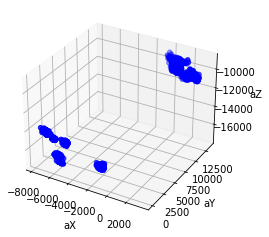

In [125]:
'''Plotting Stable and Shaking Dataset'''
stable = pd.read_csv("Dataset/output0.csv")
shaking = pd.read_csv("Dataset/output1.csv")
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(shaking['gX'], shaking['gY'], shaking['gZ'], c='r')
ax.scatter3D(stable['aX'], stable['aY'], stable['aZ'], c='b')
ax.set_xlabel('aX')
ax.set_ylabel('aY')
ax.set_zlabel('aZ')
#plt.scatter(shaking['aX'], shaking['aY'], c='r')
#plt.scatter(stable['aX'], stable['aY'], c='b')
#plt.plot(shaking['mX'], c='r')
#plt.plot(stable['mX'], c='b')
#plt.savefig('Mag Stable Graph')
plt.show()

In [49]:
def measuring_parameters(test, pred):
    accuracy = accuracy_score(test, pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(test, pred, average='macro')
    print("Accuracy:",accuracy)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F1-score:",f1_score) 

In [86]:
def plot_CM(model, xtest, ytest, pred):    
    disp = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, normalize=None)
    disp.ax_.set_title("Confusion matrix")
    plt.savefig(str(model) + " CM")
    plt.show()

In [91]:
def save_model(model):
    with open(str(model)+'model.pickle', 'wb') as f:
        pickle.dump(model, f)

Accuracy: 0.7680676270984641
Precision: 0.765684691410303
Recall: 0.765684691410303
F1-score: 0.765684691410303


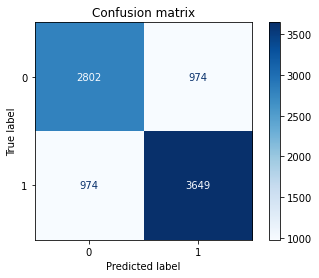

In [92]:
'''Logistic Regression Model'''
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test) 
measuring_parameters(Y_test, Y_pred)
plot_CM(model1, X_test, Y_test, Y_pred)
save_model(model1)

Accuracy: 0.8932015716156685
Precision: 0.9040231114915471
Recall: 0.9029850746268657
F1-score: 0.893197786622506


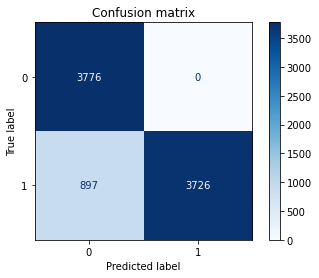

In [93]:
'''Support Vector Classifier Model'''
model2 = SVC()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test) 
measuring_parameters(Y_test, Y_pred)  
plot_CM(model2, X_test, Y_test, Y_pred)
save_model(model2)

Accuracy: 0.9961900226217407
Precision: 0.9958599180194022
Recall: 0.9964662627815235
F1-score: 0.9961532670494393


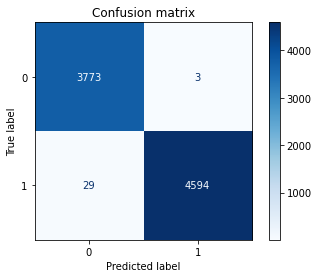

In [94]:
'''K-Nearest Neighbor Model'''
model3 = KNeighborsClassifier()
model3.fit(X_train, Y_train)
Y_pred = model3.predict(X_test) 
measuring_parameters(Y_test, Y_pred)
plot_CM(model3, X_test, Y_test, Y_pred)
save_model(model3)

Accuracy: 0.9967853315870937
Precision: 0.9967884824352704
Recall: 0.9967159126530208
F1-score: 0.9967520664107912


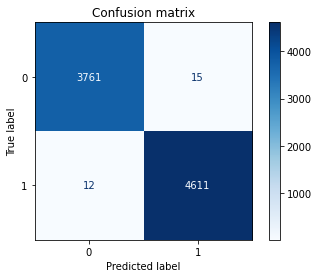

In [95]:
'''Random Forest Classifier Model'''
model4 = RandomForestClassifier()
model4.fit(X_train, Y_train)
Y_pred = model4.predict(X_test) 
measuring_parameters(Y_test, Y_pred)
plot_CM(model4, X_test, Y_test, Y_pred)
save_model(model4)